<a href="https://colab.research.google.com/github/Haooo517/Generation_AI/blob/main/NTNU_41147006S_%E8%B3%87%E5%B7%A5115_%E5%BC%B5%E8%A8%93%E8%B1%AA_HW10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 製作屬於自己的圖片生成機器人

首先下載所有這次要用到的東西 <br>
為了更清楚地顯示所有要用到的套件 <br>
因此這邊把每一個都分開下載

In [1]:
!pip install diffusers --upgrade
!pip install transformers --upgrade
!pip install accelerate --upgrade
!pip install gradio --upgrade
!pip install safetensors --upgrade
!pip install huggingface_hub --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 124.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 99.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

再來是要先登入 Hugging Face <br>
這樣才能使用裡面提供的非開源模型 <br>
所以也要用到 Google Colab 的密鑰來存 Token

In [2]:
from huggingface_hub import login
from google.colab import userdata

hf_token = userdata.get('HuggingFace')
login(token=hf_token)

再來把等等會用到的套件都 import 進來 <br>

In [3]:
import torch
import gradio as gr
from diffusers import StableDiffusionXLPipeline

接著設定好模型 <br>
並且讀到 Stable Diffusion 的 pipeline 裡面

In [4]:
pipe = StableDiffusionXLPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True
).to("cuda")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder_2/model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/5.14G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.fp16.safeten(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

vae_1_0/diffusion_pytorch_model.fp16.saf(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

然後是設定這次的機器人 <br>
這次我給他的主題是動漫風機器人 <br>
他可以讓玩家自由選擇要怎麼

In [ ]:
STYLE_SUFFIXES = {
    "日式動漫風": ", japanese anime style, vibrant colors, 2D illustration",
    "美式卡通風": ", cartoon style, flat shading, retro animation look",
    "電玩像素風": ", pixel art, 8-bit video game style, retro aesthetic",
    "Q版動畫風": ", chibi character, cute, large head, small body, colorful 2D style",
    "迪士尼電影風": ", disney style, 3D animation, cinematic lighting, expressive characters"
}

# 🪄 修飾提示詞功能：根據風格補強 prompt
def refine_prompt(user_prompt, style):
    suffix = STYLE_SUFFIXES.get(style, "")
    if not user_prompt.strip():
        return "Please enter a prompt first!"
    return user_prompt.strip() + suffix

# 生成圖片
def generate_image(prompt, style, guidance, steps, seed):
    suffix = STYLE_SUFFIXES.get(style, "")
    full_prompt = prompt + suffix if suffix not in prompt else prompt
    generator = torch.Generator("cuda").manual_seed(seed)
    image = pipe(prompt=full_prompt,
                 guidance_scale=guidance,
                 num_inference_steps=steps,
                 generator=generator).images[0]
    return image

# Gradio 中文介面
with gr.Blocks(title="Cartoona - 多風格卡通圖片生成器") as demo:
    gr.Markdown("# 🎨 Cartoona - 多風格卡通圖片生成器")
    gr.Markdown("輸入提示詞 → 選擇風格 → 點「🪄 修飾提示詞」可自動補上風格描述 → 生成卡通風格圖片！")

    with gr.Row():
        prompt = gr.Textbox(label="提示詞", placeholder="請用英文輸入，例如：A cat walking in the city")
        style = gr.Dropdown(
            label="選擇風格",
            choices=list(STYLE_SUFFIXES.keys()),
            value="日式動漫風"
        )

    with gr.Row():
        refine_btn = gr.Button("🪄 修飾提示詞")
        refine_btn.click(fn=refine_prompt, inputs=[prompt, style], outputs=prompt)

    with gr.Row():
        guidance = gr.Slider(1, 20, value=7.5, label="🎨創意<--->切題🤖")
        steps = gr.Slider(10, 100, value=30, step=5, label="⏳效率<--->品質🖼️")
        seed = gr.Number(value=42, label="🎲隨機種子（相同隨機種子和輸入能產出相同結果）")

    submit = gr.Button("✨ 生成圖片")
    output = gr.Image(type="pil", label="生成圖片")

    submit.click(fn=generate_image,
                 inputs=[prompt, style, guidance, steps, seed],
                 outputs=output)

demo.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://ddebf7b29a8d46268b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

以下是以「走在街上的貓」作為 prompt <br>
經過風格修飾 prompt 之後 <br>
生成的五種不同動畫風格的圖片

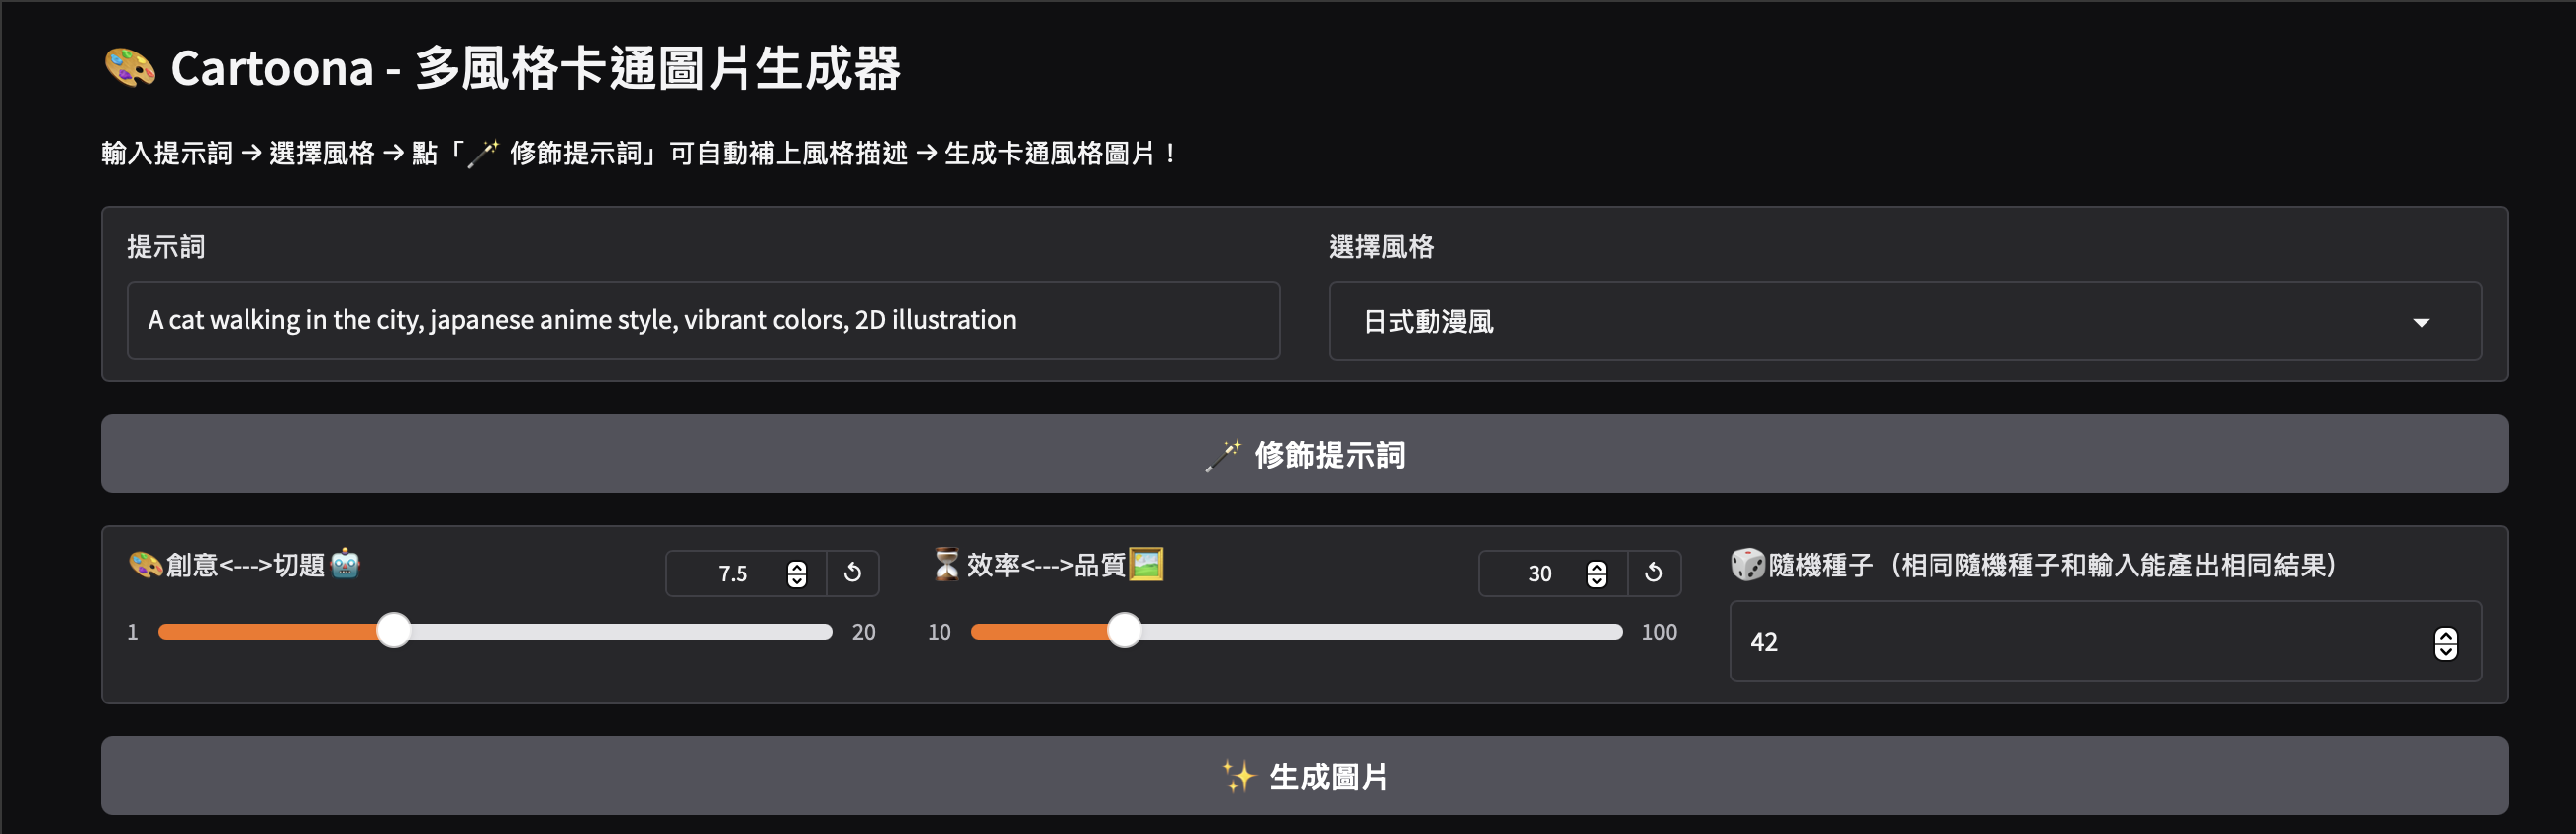

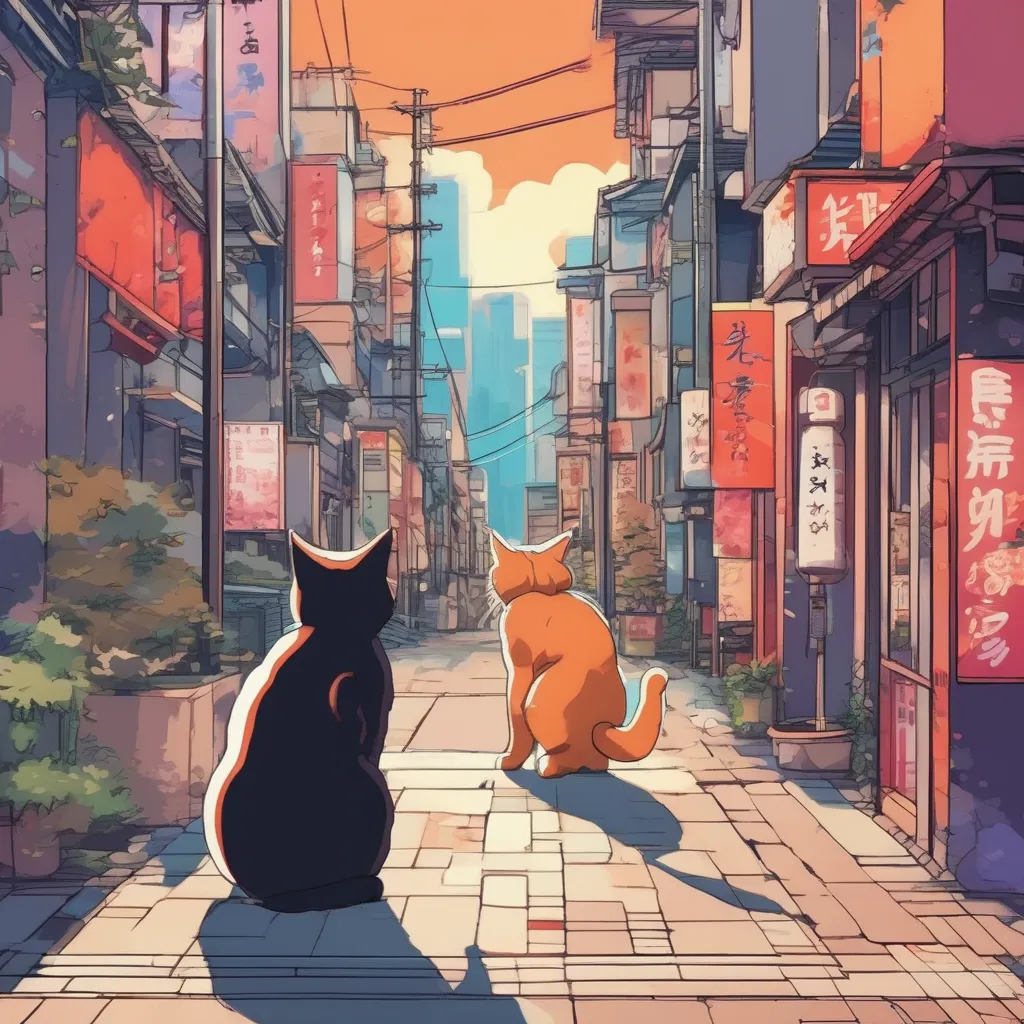

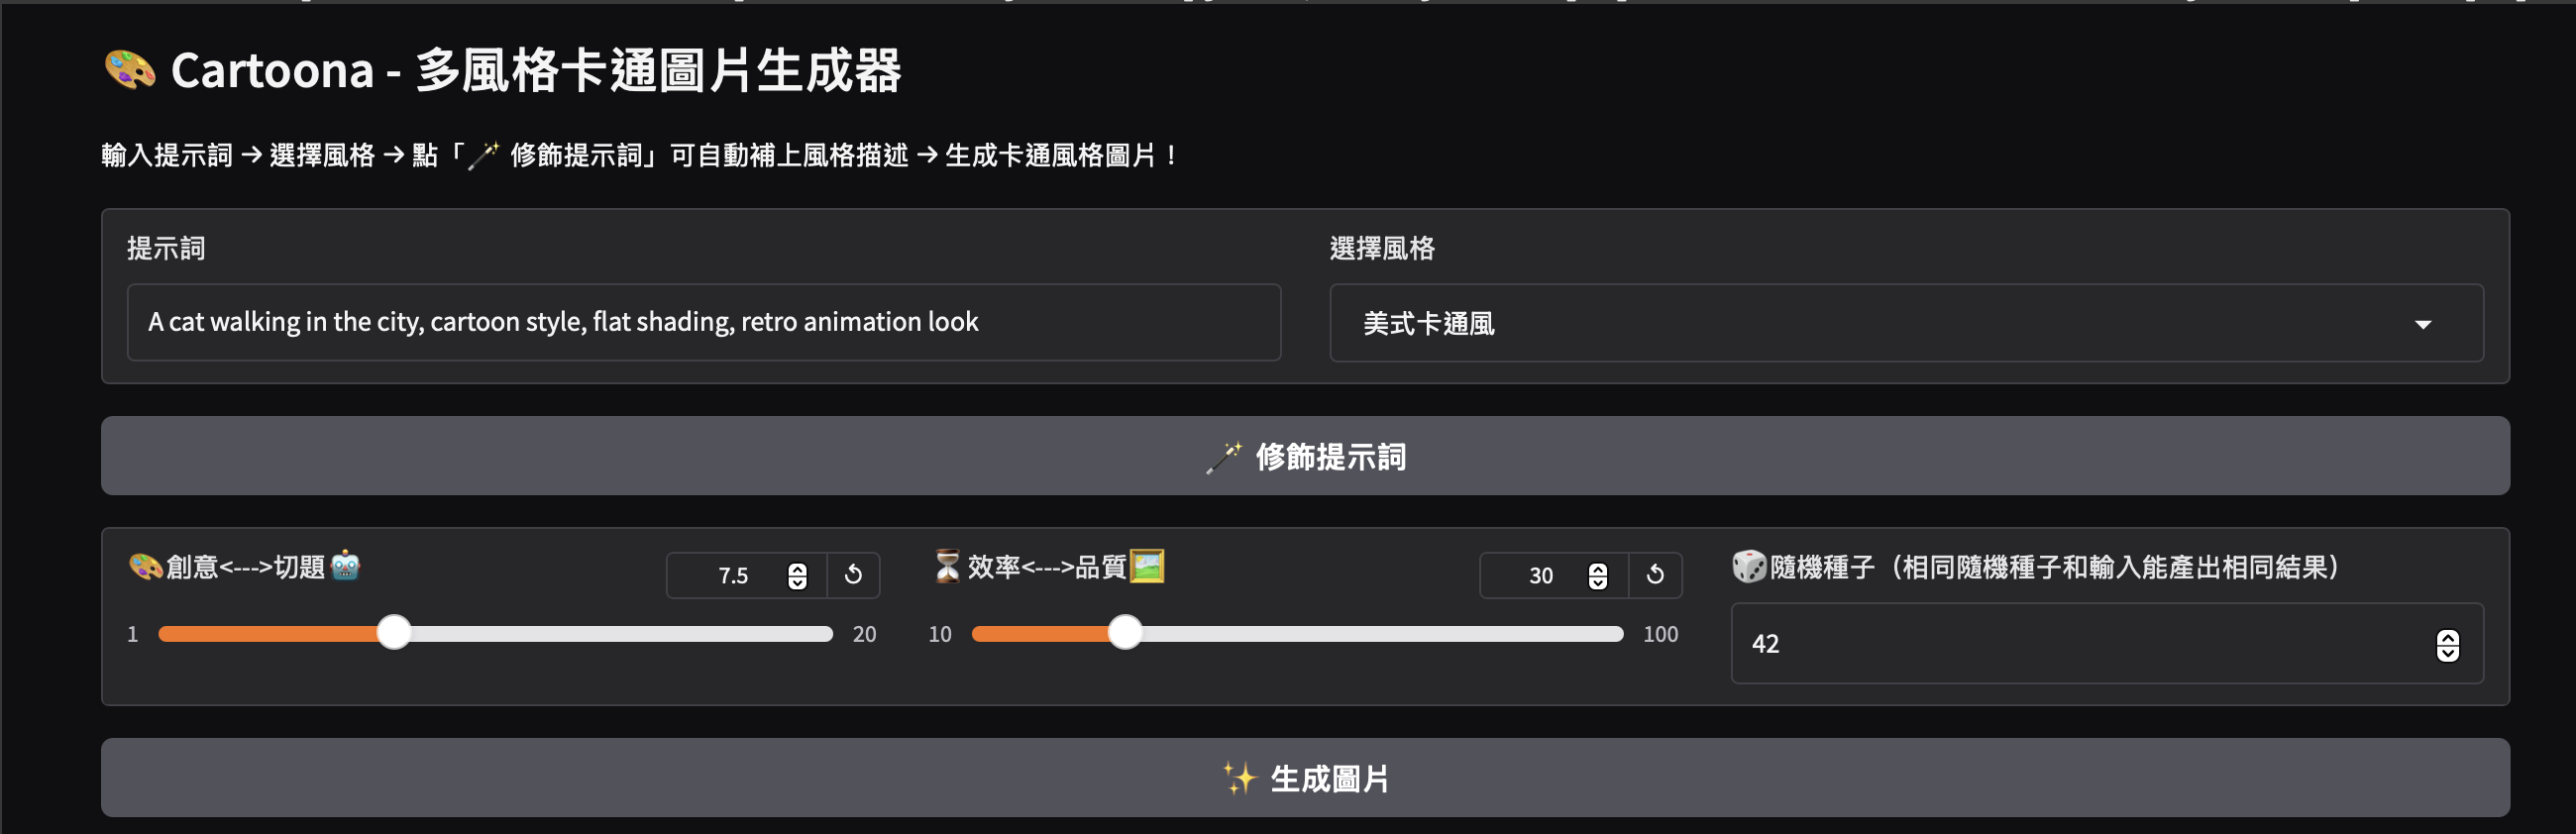

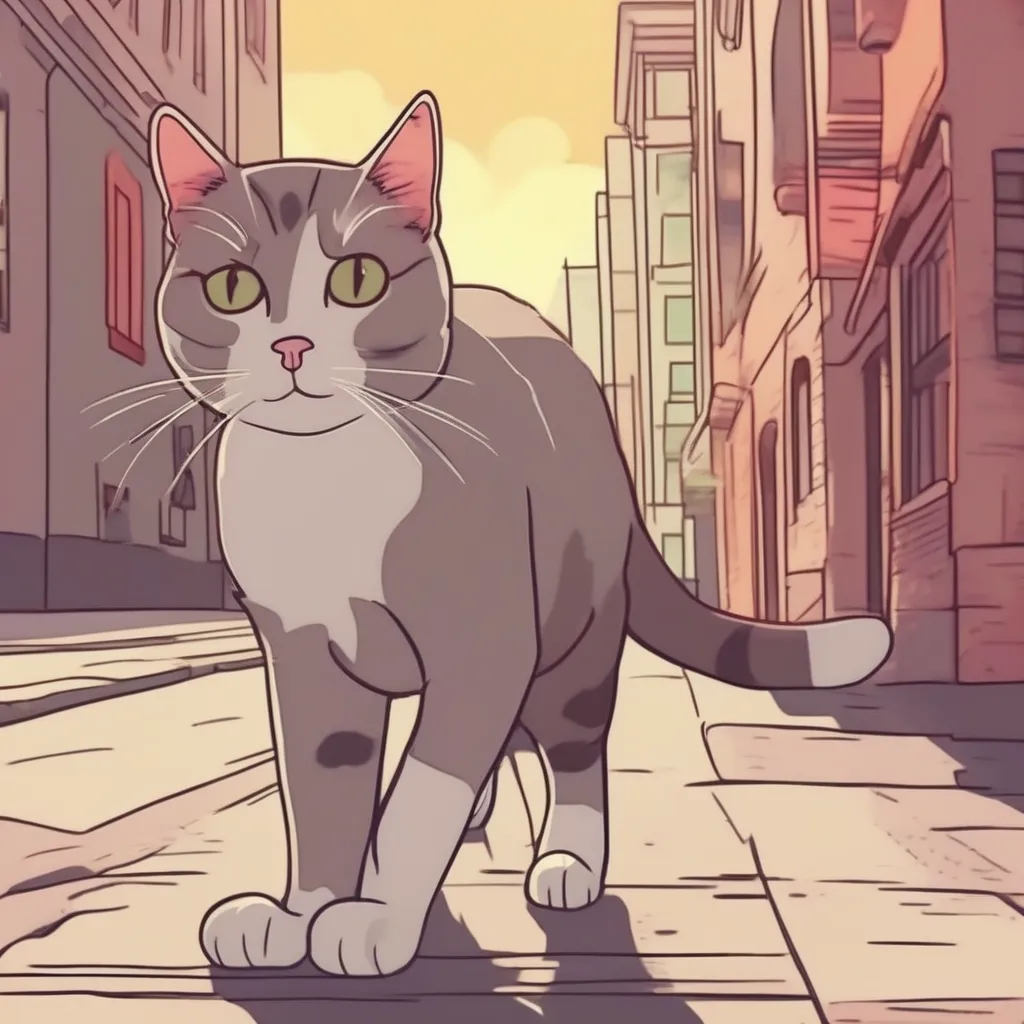

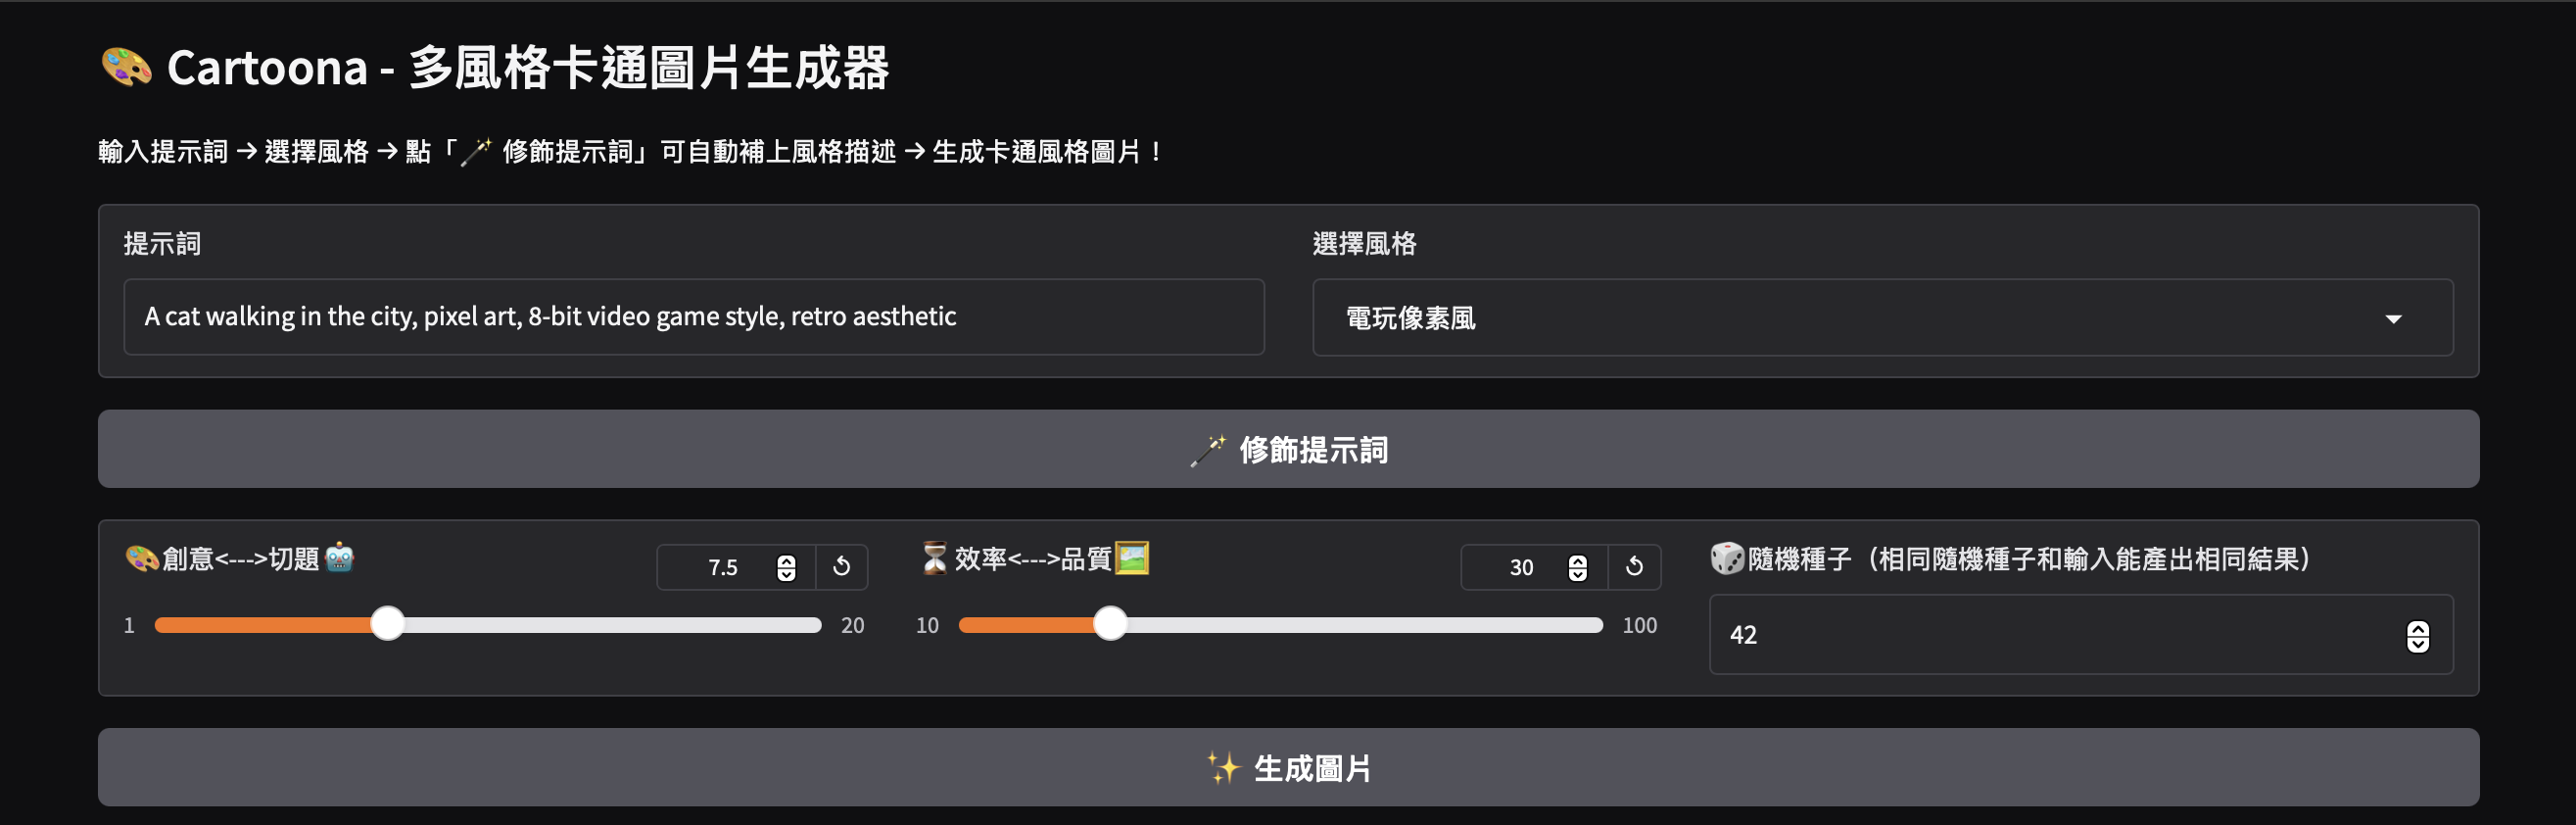

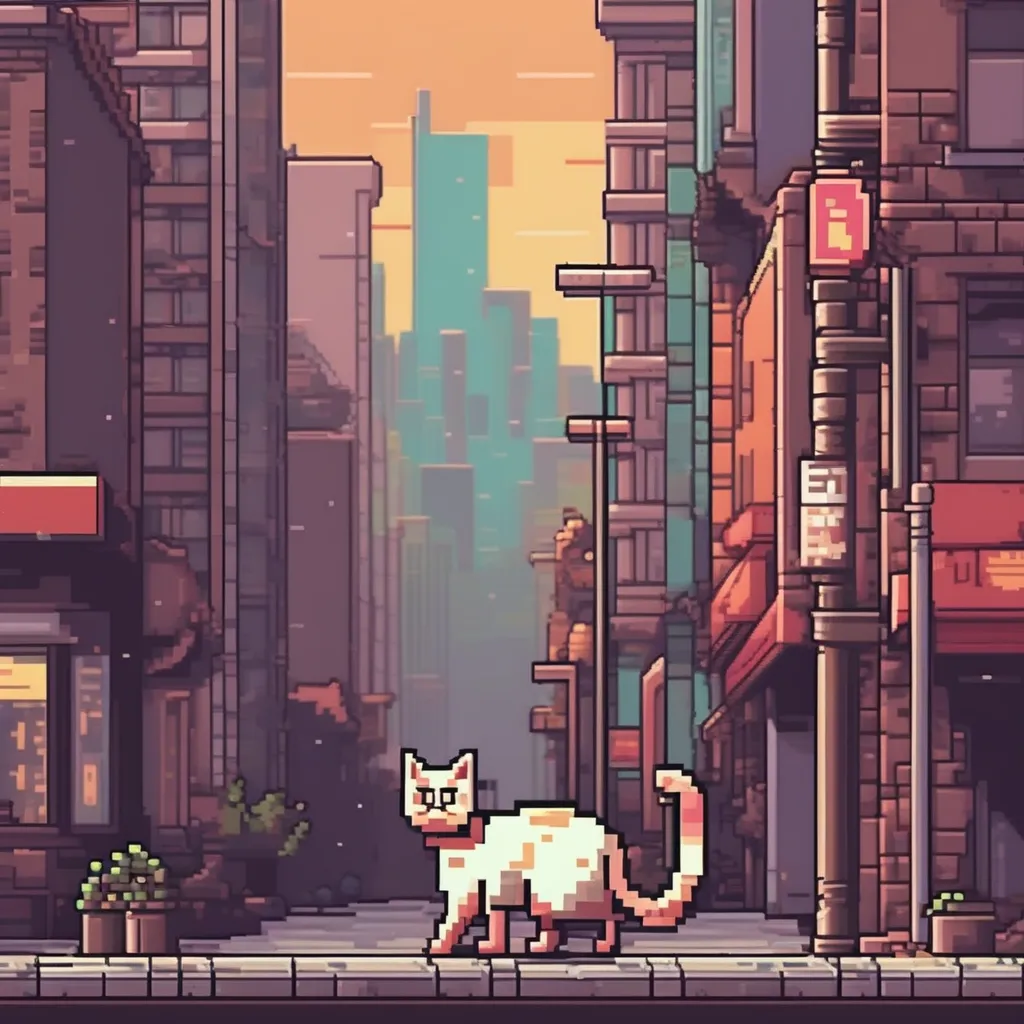

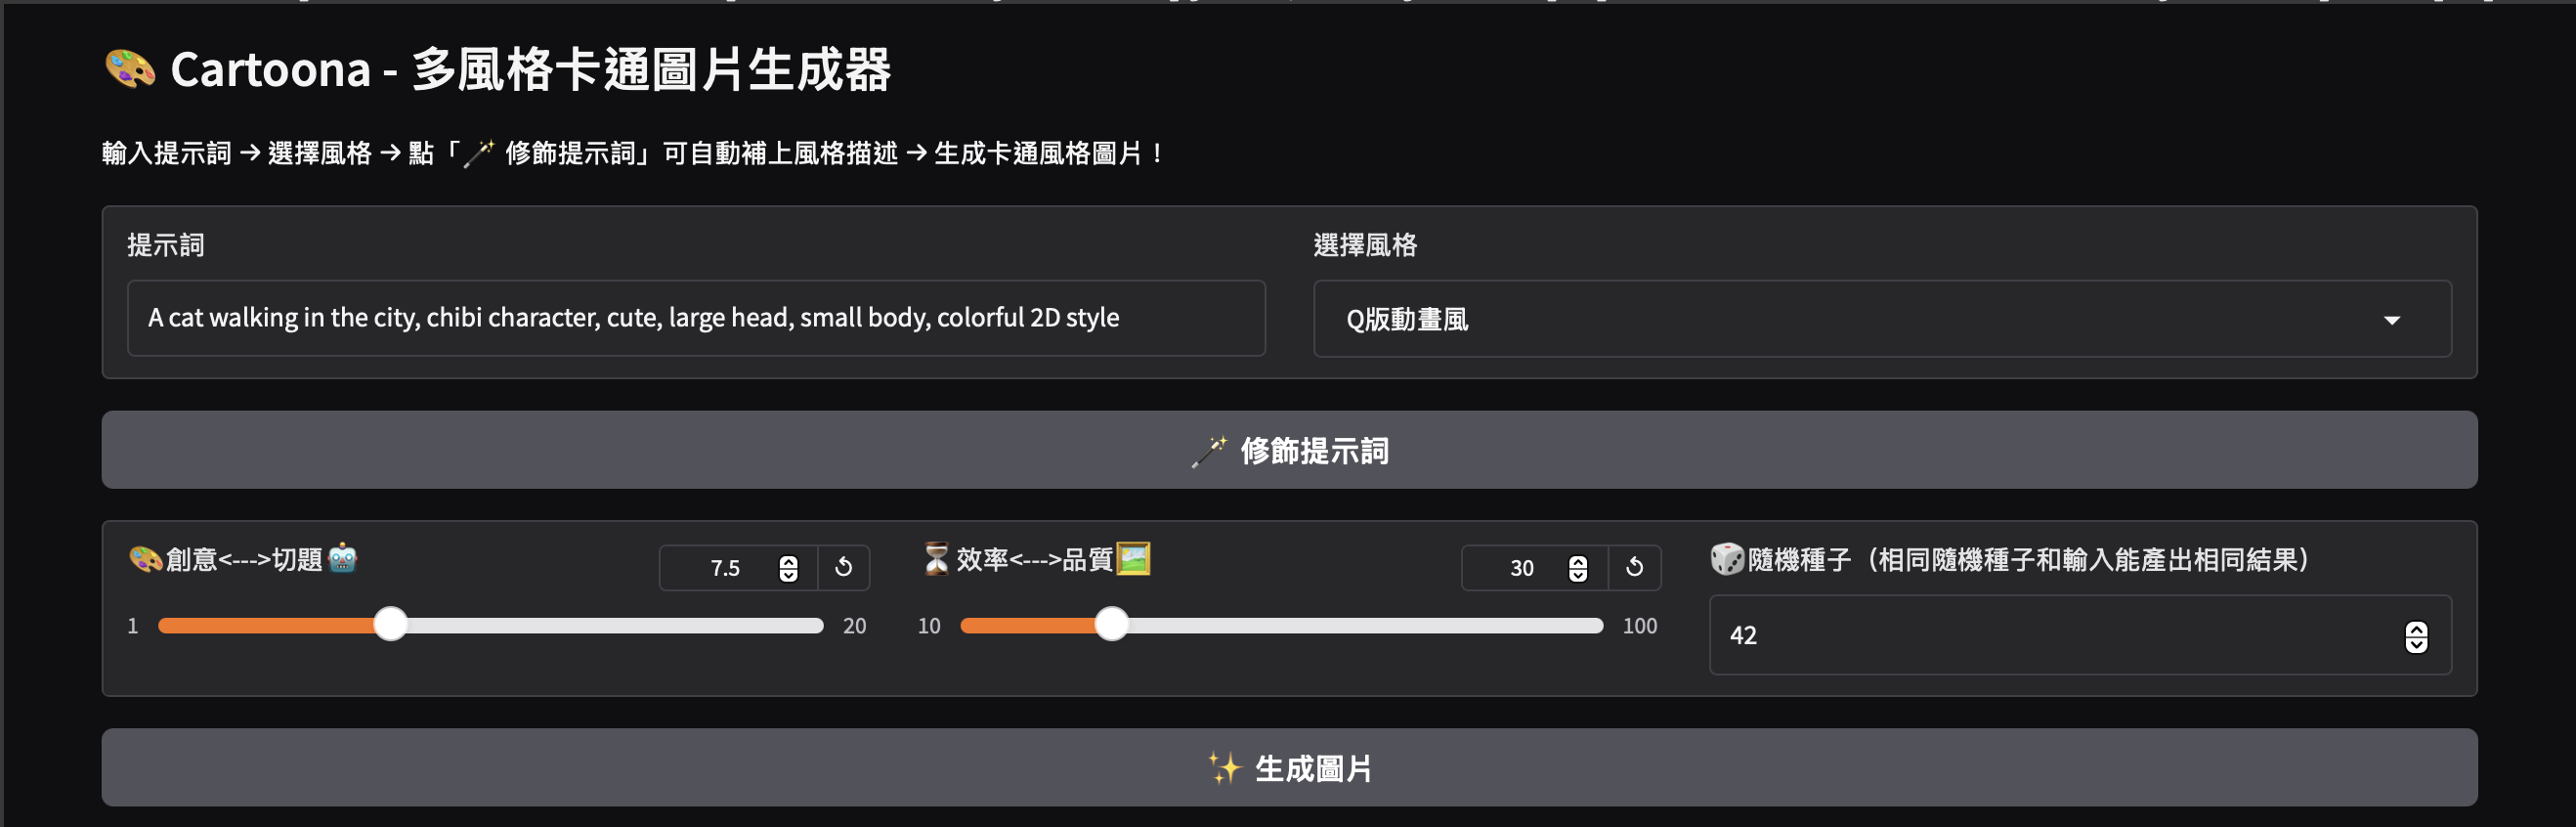

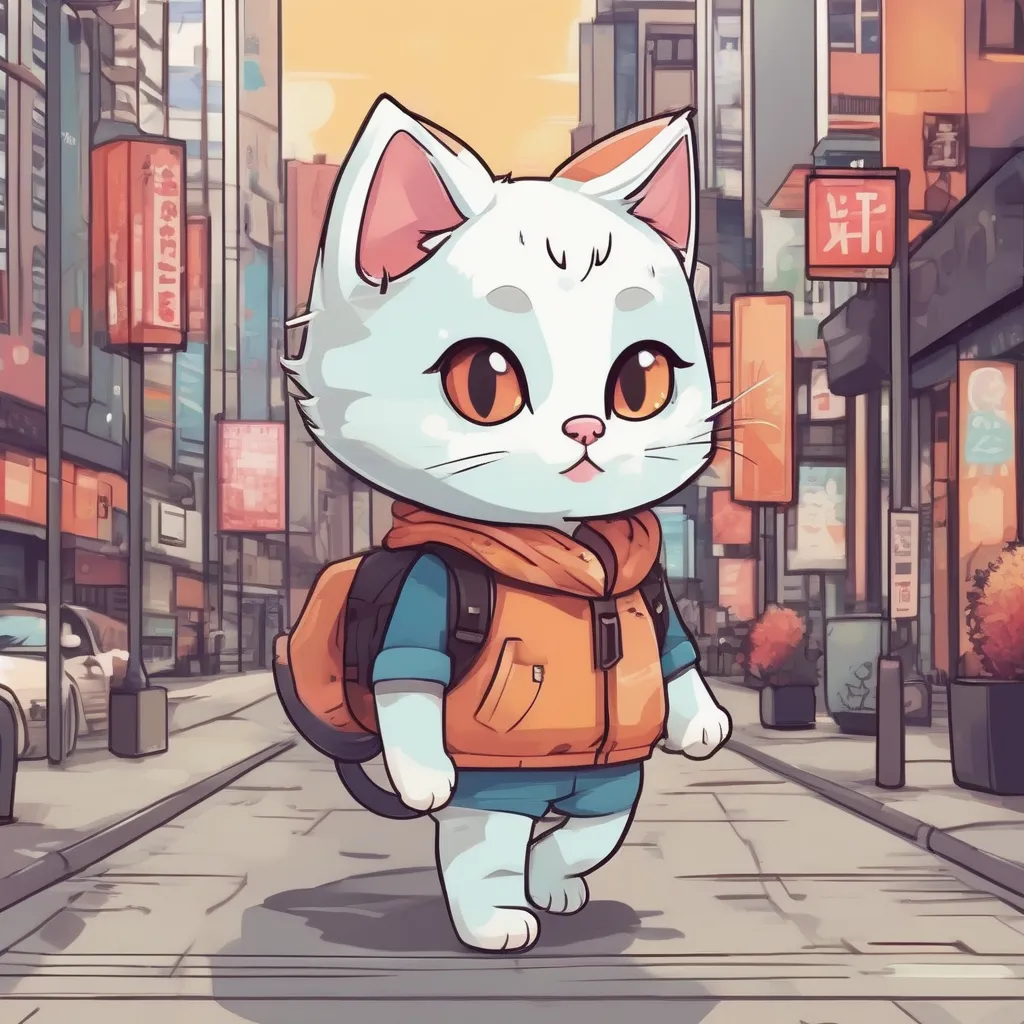

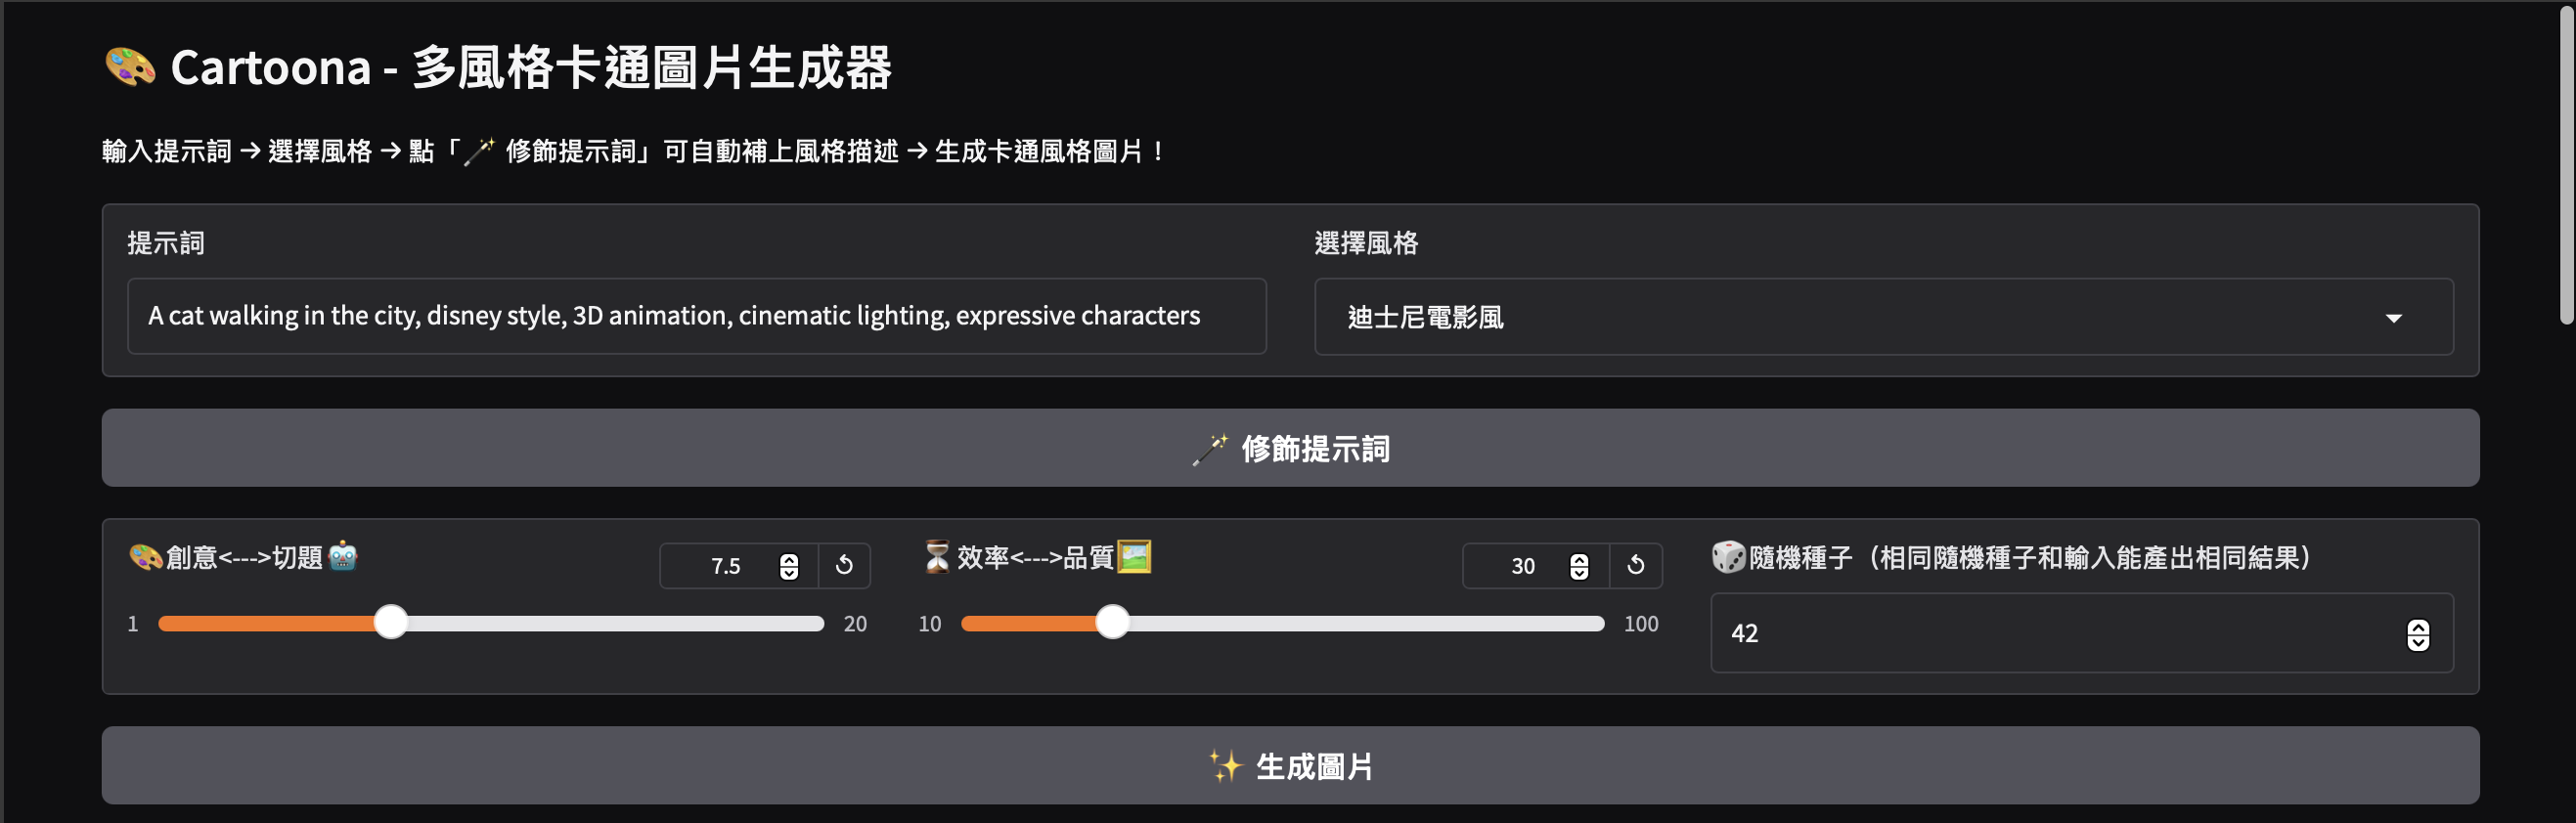

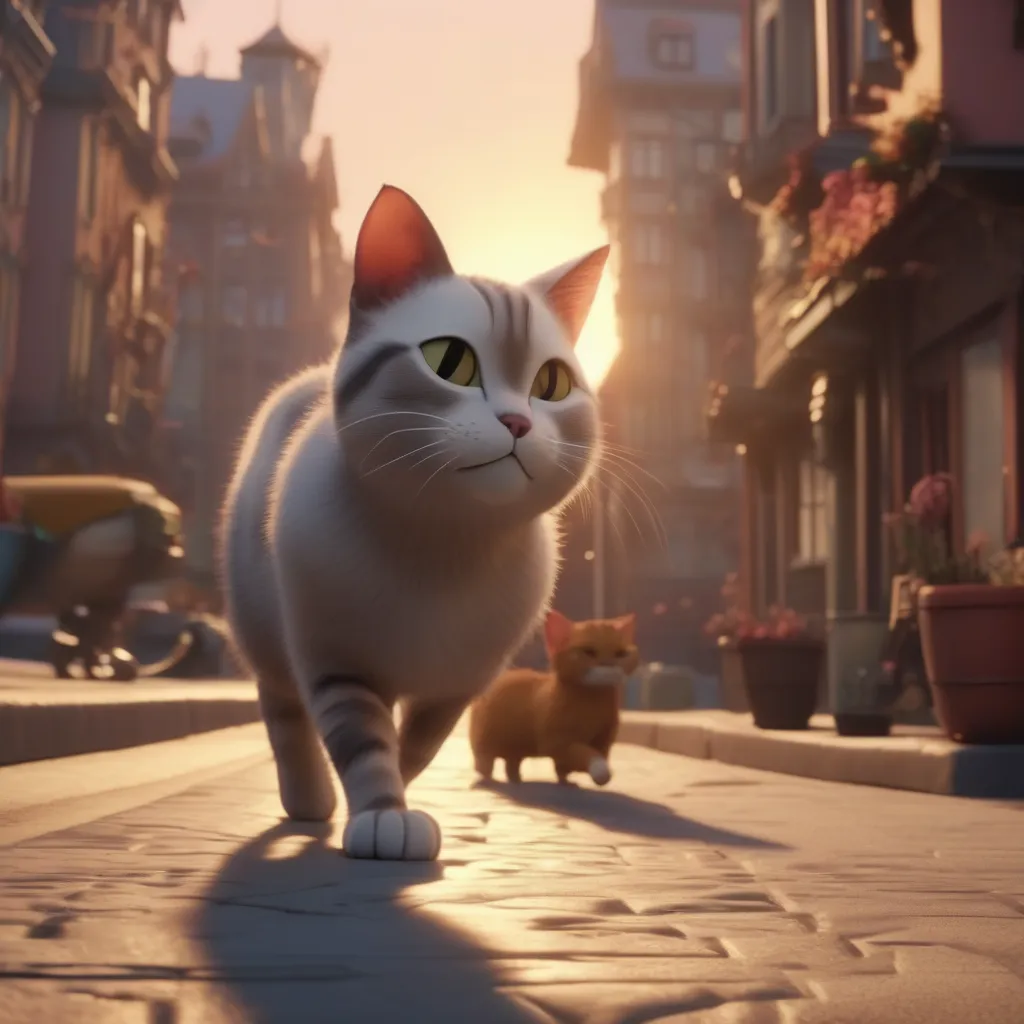